### Leitura dos dados

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("student_scores.csv")

### Análise Exploratória

In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.isna().any()

Hours     False
Scores    False
dtype: bool

In [ ]:
import matplotlib.pyplot as plt

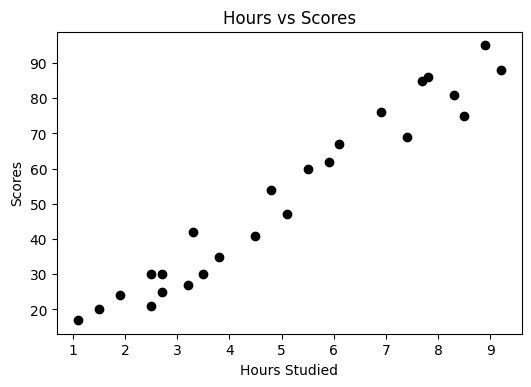

In [ ]:
plt.rcParams["figure.dpi"] = 100
plt.scatter(df["Hours"], df["Scores"], color="black")
plt.title("Hours vs Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Scores")
plt.show()

In [ ]:
import numpy as np

data_x = np.array(list(df["Hours"])).reshape(-1, 1)
data_y = np.array(list(df["Scores"])).reshape(-1, 1)

### Divisão dos dados para teste e treino

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(data_x, data_y, test_size=0.2)

In [ ]:
print("Treino:", len(x_treino))
print("Teste:", len(x_teste))

Treino: 20
Teste: 5


### Criação do modelo

In [ ]:
from sklearn import linear_model

In [ ]:
modelo = linear_model.LinearRegression()
modelo.fit(x_treino, y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("Coeficiente:", modelo.coef_)

Coeficiente: [[10.0164198]]


### Predições

In [ ]:
y_predicao = modelo.predict(x_teste)

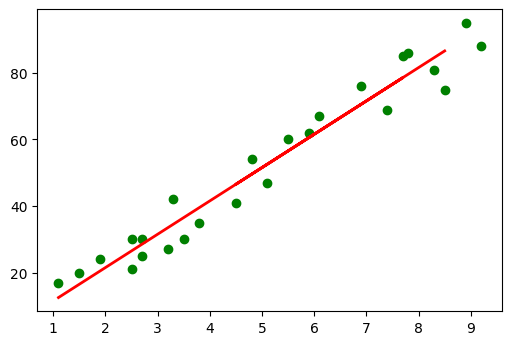

In [ ]:
# plt.scatter(x_teste, y_predicao, color="red", edgecolors="black")
plt.scatter(df["Hours"], df["Scores"], color="green")
plt.plot(x_teste, y_predicao, color="red", linewidth=2)
plt.show()

### Métrica de avaliação

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse = mean_squared_error(y_teste, y_predicao)

In [ ]:
print("MSE:", mse)

MSE: 45.786530454165344


### Predição do usuário

In [ ]:
pergunta = np.array([6, 8]).reshape(-1, 1)
resposta = modelo.predict(pergunta)

In [ ]:
for i in range(2):
    print(f"Horas estudadas {pergunta[i][0]}, terá uma nota {resposta[i][0]}")

Horas estudadas 6, terá uma nota 61.568390175486606
Horas estudadas 8, terá uma nota 81.60122977456983
